In [89]:
# import pandas as pd
# #!pip install geocoder
# !pip install gensim
# import geocoder
# import numpy as np
# import gensim
# import os
# import string
# import re
# import pprint
# from gensim import corpora, models, similarities
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
# from sklearn.manifold import TSNE
# import nltk
# from nltk import word_tokenize, tokenize
# nltk.download('punkt')

# %matplotlib inline
# from matplotlib import pyplot as plt
#!pip install vaderSentiment
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns

In [3]:
trump_pd = pd.read_csv('../data/hashtag_donaldtrump.csv', engine='python')
trump_pd

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529221557252e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,360666534.0,El Sol Latino News,elsollatinonews,ðŸŒ� Noticias de interÃ©s para latinos de la c...,...,1860.0,"Philadelphia, PA / Miami, FL",25.77427,-80.19366,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.3165292227484303e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,331617619.0,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529228091847e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8436472.0,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.5202471,-122.6741949,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529227471237e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.28355589206057e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.3165292523014513e+18,You get a tie! And you get a tie! #Trump â€˜s ...,4.0,3.0,Twitter for iPhone,47413798.0,Rana Abtar - Ø±Ù†Ø§ Ø£Ø¨ØªØ±,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.8949924,-77.0365581,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971082,2020-11-08 23:59:43,1.3255888434882765e+18,@PelleX @Mikerger @spiegelbilderz_ @BertiFranz...,0.0,0.0,Twitter Web App,3427951089.0,Alexander P. Vogt,APVogt,Wenn das Aussprechen der Wahrheit Â»den Falsch...,...,2106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 17:47:56.036006
971083,2020-11-08 23:59:48,1.3255888660451942e+18,JOE BIDEN WHY JOE BIDEN DID WINNED ?? TRUMP TR...,4.0,0.0,Twitter Web App,3245258109.0,ahzy,ahhhzy,NaN,...,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 17:47:55.715870
971084,2020-11-08 23:59:53,1.3255888855152271e+18,#AfD|ler reagieren panisch bis hysterisch auf ...,25.0,4.0,Twitter Web App,9.866107585731788e+17,watchdog,wilke_tobias,Quis custodiet ipsos custodes?\n\nTV Journalis...,...,3014.0,Saxony/GER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 17:47:55.975868
971085,2020-11-08 23:59:54,1.3255888929054024e+18,"@sammelbis1998 @iheartmindy @bnorthg First, yo...",0.0,0.0,Twitter for iPad,768781141.0,Debra,drdeblk,MD. Autism specialist. Film lover. #DumpTrump2020,...,1079.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 17:47:56.012674


In [4]:
biden_pd = pd.read_csv('../data/hashtag_joebiden.csv', engine='python')
biden_pd

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529221557252e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,360666534.0,El Sol Latino News,elsollatinonews,ðŸŒ� Noticias de interÃ©s para latinos de la c...,...,1860.0,"Philadelphia, PA / Miami, FL",25.77427,-80.19366,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:18,1.31652929585929e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,809904438.0,Cheri A. ðŸ‡ºðŸ‡¸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",...,6628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.517827283
2,2020-10-15 00:00:20,1.3165293050069524e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3494182277.0,Flag Waver,Flag_Wavers,NaN,...,1536.0,Golden Valley Arizona,46.3040364,-109.17143119999999,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566
3,2020-10-15 00:00:21,1.3165293080815575e+18,@chrislongview Watching and setting dvr. Letâ€...,0.0,0.0,Twitter for iPhone,8.242596012018524e+17,Michelle Ferg,MichelleFerg4,NaN,...,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849
4,2020-10-15 00:00:22,1.316529312741253e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032806955356545e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,...,390.0,"California, USA",36.7014631,-118.75599740000001,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777068,2020-11-08 23:59:38,1.3255888248362353e+18,Stop laying @CNN !\n#Paris and #London dont gi...,0.0,0.0,Twitter for iPhone,387361991.0,flaquet,flaquet1,NaN,...,27.0,PARIS,48.856696899999996,2.3514616000000004,Paris,France,Europe,Ile-de-France,IDF,2020-11-09 18:32:45.613547
777069,2020-11-08 23:59:38,1.325588825654096e+18,Î©Ï‡ ÎµÎ»Ï€Î¯Î¶Ï‰ Î½Î± Î¼Î· Î¼Î±Ï‚ Î²Î³ÎµÎ¹ Ï...,0.0,0.0,Twitter for Android,403281875.0,Î¿Ï‡Î¹ Î¬Î»Î»Î¿ ÎºÎ¬Ï�Î²Î¿Ï…Î½Î¿ ðŸ‡¬ðŸ‡·ðŸ—£ð...,anapodoi,Î±ÎºÏ�Î±Î¯Î± ÎºÎ±Î¹Ï�Î¹ÎºÎ¬ Ï†Î±Î¹Î½ÏŒÎ¼ÎµÎ½Î±...,...,772.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 18:32:45.947617
777070,2020-11-08 23:59:41,1.3255888381237576e+18,L'OTAN va sortir de sa lÃ©thargie et redevenir...,48.0,14.0,Twitter for Android,7.81918265400492e+17,ðŸ‡«ðŸ‡· Alt-Droite (matricule 6921) âœ�ï¸� ðŸ...,CtrlAltDroite,Fils de mineur. LibertÃ©s - IdentitÃ© - Solida...,...,15806.0,France,46.603353999999996,1.8883334999999999,NaN,France,Europe,NaN,NaN,2020-11-09 18:32:45.627335
777071,2020-11-08 23:59:52,1.3255888813460152e+18,ðŸŒŽ\n\nâ€œ#congiuntifuoriregioneâ€�\n\nâ€˜Son...,1.0,1.0,Twitter for iPhone,529331509.0,Angelo Tani,AngeloTani,nato a casa dei nonni,...,5974.0,ðŸŒŽ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 18:32:45.599846


In [5]:
biden_pd.columns

Index(['created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count', 'source',
       'user_id', 'user_name', 'user_screen_name', 'user_description',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'continent', 'state', 'state_code',
       'collected_at'],
      dtype='object')

In [15]:
def df_by_state(df, state_code):
    return df[df['state_code'] == state_code]

def df_merge_by_state(df_trump, df_biden):
    df_trump['hashtag'] = 'trump'
    df_biden['hashtag'] = 'biden'
    return pd.concat([df_trump, df_biden], ignore_index=True)

In [7]:
mi_biden_df = df_by_state(biden_pd, 'MI')
mi_trump_df = df_by_state(trump_pd, 'MI')
mi_df = df_merge_by_state(mi_trump_df, mi_biden_df)
mi_df

In [17]:
il_biden_df = df_by_state(biden_pd, 'IL')
il_trump_df = df_by_state(trump_pd, 'IL')
il_df = df_merge_by_state(il_trump_df, il_biden_df)
il_df

C:\Users\CK\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\CK\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,hashtag
0,2020-10-15 00:00:25,1.3165293244182405e+18,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Twitter for iPhone,19940334.0,Change Illinois | Biden will increase taxes by...,changeillinois,"Illinois, home of Lincoln and Reagan, used to ...",...,"Chicago, Illinois",41.875561600000005,-87.6244212,Chicago,United States of America,North America,Illinois,IL,2020-10-21 00:00:04.105381834,trump
1,2020-10-15 00:01:30,1.3165295949089055e+18,@karatblood @KazePlays_JC Grab @realDonaldTrum...,2.0,0.0,Twitter for iPhone,36024393.0,Baylee,bayleewashere,"when the going gets tough, the weird turn pro....",...,"Western Washington, USA",41.8828229,-87.686307,Chicago,United States of America,North America,Illinois,IL,2020-10-21 00:00:10.823279381,trump
2,2020-10-15 00:01:44,1.316529653969019e+18,Who does #trump owe 420 million dollars to? Wh...,1.0,0.0,Twitter Web App,16110770.0,Therese Flanagan ðŸŒŠ ðŸ�³ï¸�â€�ðŸŒˆâœŠ,thereseflanagan,I read; I write; I shoot photos. Chocolate is ...,...,Chicago,41.875561600000005,-87.6244212,Chicago,United States of America,North America,Illinois,IL,2020-10-21 00:00:13.435795093,trump
3,2020-10-15 00:02:55,1.3165299549438853e+18,@glennkirschner2 So basically the American exp...,0.0,0.0,Twitter for iPhone,1.289585269549695e+18,ðŸ“¢Say It Loud!ðŸ“¢,NikkiPayge,"Nothin special just ur erâ€™day unapologetic,a...",...,"Chicago, IL",41.875561600000005,-87.6244212,Chicago,United States of America,North America,Illinois,IL,2020-10-21 00:00:22.019775292,trump
4,2020-10-15 00:03:52,1.3165301935914025e+18,â€œWe have heard the Election called at midnig...,0.0,0.0,Twitter for iPad,120969408.0,Mark Burger,markburgerenerg,"Solar consultant, 21st Century 100% renewable ...",...,"Oak Park, IL",41.887814500000005,-87.78876149999999,NaN,United States of America,North America,Illinois,IL,2020-10-21 00:00:30.230538960,trump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12272,2020-11-08 22:23:48,1.3255647048618598e+18,These narratives here are never accurate but e...,1.0,0.0,Twitter for Android,19408573.0,Keem ðŸ¤´ðŸ�¾,keem773,"No Avi? No Reply! Tech Junkie, Stock Trader & ...",...,"Chicago, IL",41.875561600000005,-87.6244212,Chicago,United States of America,North America,Illinois,IL,2020-11-09 18:32:59.538818,biden
12273,2020-11-08 22:24:12,1.3255648062927913e+18,WATCH: Leader #KevinMcCarthy on #MariaBartirom...,0.0,0.0,Twitter for iPhone,98253781.0,@Steve60712: Steve Solaka www.Steve60712.com,Steve60712,My Other Accâ€™s @SteveSolaka @ChicagoForTrump...,...,"Chicago, Illinois",41.875561600000005,-87.6244212,Chicago,United States of America,North America,Illinois,IL,2020-11-09 18:32:59.364982,biden
12274,2020-11-08 22:39:40,1.3255687014590136e+18,#Bidenâ€™s Lead Over #Trump in #Arizona Again ...,0.0,0.0,Twitter Web App,113394347.0,jjvors,jjvors,"#Author into science, technology, politics, h...",...,Peoria IL,40.6938609,-89.5891008,Peoria,United States of America,North America,Illinois,IL,2020-11-09 18:32:56.182893,biden
12275,2020-11-08 23:08:10,1.3255758712105984e+18,Nobody in the Republican party can be taken se...,7.0,2.0,TweetDeck,25639035.0,Erik Childress,EriktheMovieman,"Producer - Chicago Critics Film Festival, Chic...",...,"Chicago, Elk Grove Village",42.0372243,-87.9815292,NaN,United States of America,North America,Illinois,IL,2020-11-09 18:32:53.137795,biden


In [18]:
pa_biden_df = df_by_state(biden_pd, 'PA')
pa_trump_df = df_by_state(trump_pd, 'PA')
pa_df = df_merge_by_state(pa_trump_df, pa_biden_df)
pa_df

C:\Users\CK\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\CK\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,hashtag
0,2020-10-15 00:00:20,1.3165293013329183e+18,One of the single most effective remedies to e...,0.0,0.0,Twitter Web App,540476889.0,Jamieo,jamieo33,"Don't know what I am. Can lean left and right,...",...,"Pennsylvania, USA",40.9699889,-77.72788309999999,NaN,United States of America,North America,Pennsylvania,PA,2020-10-21 00:00:02.985732243,trump
1,2020-10-15 00:03:04,1.3165299923485983e+18,#DonaldTrump #TheInfected @POTUS is a doofus w...,1.0,0.0,Twitter for Android,2912733831.0,Diane Harris,DhLadylaw,"ðŸŒŠðŸŒŠðŸŒŠAmbassador For Christ,\nProud Moth...",...,"Philadelphia, PA",39.9527237,-75.16352619999999,Philadelphia,United States of America,North America,Pennsylvania,PA,2020-10-21 00:00:23.885857944,trump
2,2020-10-15 00:08:45,1.316531420161028e+18,@MeidasTouch He can not even wing it. #Trump i...,4.0,0.0,Twitter Web App,540476889.0,Jamieo,jamieo33,"Don't know what I am. Can lean left and right,...",...,"Pennsylvania, USA",40.9699889,-77.72788309999999,NaN,United States of America,North America,Pennsylvania,PA,2020-10-21 00:01:05.686109347,trump
3,2020-10-15 00:10:14,1.316531792749441e+18,These people that @Acosta is interviewing at a...,1.0,0.0,Twitter Web App,290748711.0,Debra Isaacs Schafer,DebraISchafer,I care about work/life | working parents & car...,...,Philadelphia area,39.9527237,-75.16352619999999,Philadelphia,United States of America,North America,Pennsylvania,PA,2020-10-21 00:01:15.762955667,trump
4,2020-10-15 00:18:07,1.31653377935641e+18,Another #Murdoch hack job - just like @FoxNews...,0.0,0.0,Twitter Web App,61854283.0,Donna Cavanagh,dtcav,"Humor entrepreneur, humorist, author,Founder h...",...,"Philadelphia, PA",39.9527237,-75.16352619999999,Philadelphia,United States of America,North America,Pennsylvania,PA,2020-10-21 00:02:00.548939313,trump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12410,2020-11-08 23:38:40,1.3255835465101558e+18,@howardfineman #Biden,1.0,0.0,Twitter for iPhone,390438226.0,Brett Rapp ðŸ‡ºðŸ‡¸,bmrapp,NaN,...,"Pittsburgh, PA",40.4416941,-79.99008609999998,Pittsburgh,United States of America,North America,Pennsylvania,PA,2020-11-09 18:32:47.825144,biden
12411,2020-11-08 23:40:42,1.325584058072658e+18,@howardfineman #Biden,1.0,0.0,Twitter for iPhone,3180995531.0,Barbara Cunningham,barb62197,NaN,...,"Pittsburgh, PA",40.4416941,-79.99008609999998,Pittsburgh,United States of America,North America,Pennsylvania,PA,2020-11-09 18:32:48.164899,biden
12412,2020-11-08 23:50:23,1.3255864971275346e+18,Just a reminder that the #Republican party @GO...,3.0,0.0,Twitter for iPhone,266628933.0,R.J. Hufnagel,RJHuf,"Writer/Editor, USW@Work @steelworkers. Former ...",...,Pittsburgh,40.4416941,-79.99008609999998,Pittsburgh,United States of America,North America,Pennsylvania,PA,2020-11-09 18:32:47.178969,biden
12413,2020-11-08 23:56:15,1.3255879736190198e+18,Will #criticalRaceTheory become ubiquitous in ...,0.0,0.0,Twitter Web App,409571529.0,Howard Wachtel,mindovermath,Retired college #math professor. Single. Brid...,...,"Philadelphia, PA",39.9527237,-75.16352619999999,Philadelphia,United States of America,North America,Pennsylvania,PA,2020-11-09 18:32:45.773127,biden


In [107]:
ca_biden_df = df_by_state(biden_pd, 'CA')
ca_trump_df = df_by_state(trump_pd, 'CA')
ca_df = df_merge_by_state(ca_trump_df, ca_biden_df)
ca_df

C:\Users\CK\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\CK\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,hashtag
0,2020-10-15 00:00:17,1.316529291052675e+18,@CLady62 Her 15 minutes were over long time ag...,2.0,0.0,Twitter for Android,1138416104.0,Farris Flagg,FarrisFlagg,#BidenHarris2020 #JoeBiden2020 #KamalaHarrisFo...,...,"Perris,California",33.7825194,-117.22864779999999,NaN,United States of America,North America,California,CA,2020-10-21 00:00:01.866082651,trump
1,2020-10-15 00:00:26,1.3165293286084813e+18,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,5.0,Twitter for Android,1.2433153463979663e+18,Ron Burgundy,Anchorman_USA,"I'm kind of a Big Deal, People know me! I driv...",...,"San Diego, CA",32.7174209,-117.16277140000001,San Diego,United States of America,North America,California,CA,2020-10-21 00:00:04.478598364,trump
2,2020-10-15 00:01:42,1.316529648323289e+18,#BlacksForTrump \n#BlackVoicesForTrump \n#Bide...,1.0,1.0,Twitter Web App,2818208253.0,RickenRich,RickenRich,Rickenbacker guitars and basses are the intere...,...,"California, USA",36.7014631,-118.75599740000001,NaN,United States of America,North America,California,CA,2020-10-21 00:00:12.689362032,trump
3,2020-10-15 00:01:53,1.3165296917343724e+18,"#TheWeek: ""#Trump in Penn: ""I saved suburbia. ...",0.0,0.0,Twitter Web App,58488519.0,thelaughmakers@gmail.com,TheLaughMakers,"Attorney, TV comedy writer, author of THE LAUG...",...,"Studio City, California",34.148398900000004,-118.39618770000001,Los Angeles,United States of America,North America,California,CA,2020-10-21 00:00:16.421527336,trump
4,2020-10-15 00:02:00,1.3165297246261043e+18,#Trump is tearing up #Biden at the #TrumpRally...,0.0,1.0,Twitter Web App,138870199.0,BIBLE MAN âœ�ï¸� Jesus' Rapture The Last Day J...,acceptjesusnow,Jesus' #Rapture Prophecy The Last Day. This is...,...,"Hemet, California",33.7475203,-116.97196840000001,NaN,United States of America,North America,California,CA,2020-10-21 00:00:16.794743867,trump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56967,2020-11-08 23:39:42,1.3255838081213276e+18,On what date can we officially start blaming a...,1.0,0.0,Twitter Web App,1244759226.0,Marc Mouallem,MarcMouallem,"Some or all of the censorship, conducted by Tw...",...,Los Angeles,34.0536909,-118.24276599999999,Los Angeles,United States of America,North America,California,CA,2020-11-09 18:32:47.897008,biden
56968,2020-11-08 23:49:46,1.3255863419297587e+18,Oigan como que ganÃ³ #Biden la #precidencia y ...,0.0,0.0,Twitter for iPhone,3038711077.0,Rudyween,rod0lf0o,Alcoholico anÃ³nimo. Siempre amargado. Irrelev...,...,"Fresno, CA",36.7295295,-119.7088613,Fresno,United States of America,North America,California,CA,2020-11-09 18:32:46.808404,biden
56969,2020-11-08 23:51:34,1.3255867948392407e+18,LIONZ DEN PRESENTS TO YOU \n\nâ€œTHE WHITE OBA...,0.0,0.0,Twitter for Android,9.870804567587471e+17,IUIC SAN DIEGO,IuicSanDiego,Leadership: Captain Zabud Email:iuic.sandiego@...,...,"San Diego, CA",32.7174209,-117.16277140000001,San Diego,United States of America,North America,California,CA,2020-11-09 18:32:45.854262,biden
56970,2020-11-08 23:52:20,1.3255869876470784e+18,#Election2020 President #Trump addresses Joe #...,0.0,0.0,Twitter Web App,1.0328676774070804e+18,ðŸ‡ºðŸ‡¸HODLit,Hodlit,Just @HODLit\n#Bitcoin #Digibyte #Theta #BAT #...,...,"California, United States",36.7014631,-118.75599740000001,NaN,United States of America,North America,California,CA,2020-11-09 18:32:45.832903,biden


In [19]:
def clean_tweets(tweets):
    pattern = r'''(?x)  # set flag to allow verbose regexps
    (?:[A-Z]\.)+        # abbreviations, e.g. U.S.A.
    |\w+(?:[-']\w+)*    # words with optional internal hyphens
    |\$?\d+(?:\.\d+)?   # currency, e.g. $12.80 
    |\.\.\.             # elipses
    |[.,;"'?()-_`]      # these are separate tokens
    '''
    string_tweets = " ".join(tweets)
    tokenized_raw = " ".join(nltk.regexp_tokenize(string_tweets, pattern))
    tokenized_raw = tokenize.sent_tokenize(tokenized_raw)

    #normalizing text
    # Remove punctuations
    nopunct = []
    for sent in tokenized_raw:
        a = [w for w in sent.split() if w not in string.punctuation]
        nopunct.append(" ".join(a))
        
    # Word tokenize
    tokens = [nltk.word_tokenize(sent) for sent in nopunct]
    return(tokens)



In [22]:
mi_tokens = clean_tweets(mi_df.tweet.tolist())
mi_unique_words = list(set([item for sublist in mi_tokens for item in sublist]))
mi_model = gensim.models.Word2Vec(mi_tokens, min_count=1, size=100, window=5)
mi_vector_list = mi_model[mi_unique_words]
print(np.array(mi_vector_list).shape)

(22038, 100)


C:\Users\CK\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [24]:
il_tokens = clean_tweets(il_df.tweet.tolist())
il_unique_words = list(set([item for sublist in il_tokens for item in sublist]))
il_model = gensim.models.Word2Vec(il_tokens,min_count=1, size=100, window=5)
il_vector_list = il_model[il_unique_words]
print(np.array(il_vector_list).shape)

(34237, 100)


C:\Users\CK\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [25]:
pa_tokens = clean_tweets(pa_df.tweet.tolist())
pa_unique_words = list(set([item for sublist in pa_tokens for item in sublist]))
pa_model = gensim.models.Word2Vec(pa_tokens,min_count=1, size=100, window=5)
pa_vector_list = pa_model[pa_unique_words]
print(np.array(pa_vector_list).shape)

(35576, 100)


C:\Users\CK\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [49]:
def kmeans_elbow_graph(X, min_clusters, max_clusters, random_seed):
    score = []
    
    for i in np.arange(min_clusters, max_clusters):
        kmeans = KMeans(n_clusters=i, random_state = random_seed)
        kmeans.fit(X)
        score.append(silhouette_score(X, kmeans.labels_))
    
    plt.scatter(np.arange(min_clusters, max_clusters), score)

def reduced_dim_df(X, words, model, best_clusters, random_seed):
    kmeans = KMeans(n_clusters = best_clusters, random_state=random_seed)
    kmeans.fit(X)
    
    clustered_df = pd.DataFrame({"word": words, "label": kmeans.labels_})
    data_embed = TSNE(n_components=2, perplexity=50, verbose=2, method='barnes_hut').fit_transform(model[words])
    clustered_df['x'] = data_embed[:, 0]
    clustered_df['y'] = data_embed[:, 1]
    return clustered_df

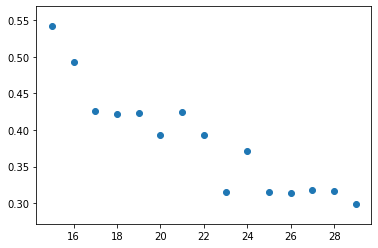

In [37]:
mi_X = np.ones(100)
for word in mi_unique_words:
    mi_X = np.vstack((mi_X, mi_model[word]))
mi_X = mi_X[1:, :]

kmeans_elbow_graph(mi_X, 15, 30, 0)

<function matplotlib.pyplot.show(*args, **kw)>

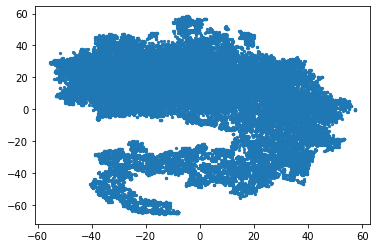

In [53]:
best_clusters = 23
mi_data_df = reduced_dim_df(mi_X, mi_unique_words, mi_model, best_clusters, 0)

plt.scatter(mi_data_df.x, mi_data_df.y, s=5)
plt.show

C:\Users\CK\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


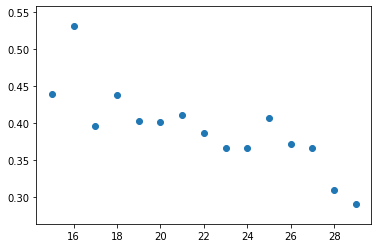

In [38]:
il_X = np.ones(100)
for word in il_unique_words:
    il_X = np.vstack((il_X, il_model[word]))
il_X = il_X[1:, :]

kmeans_elbow_graph(il_X, 15, 30, 0)

C:\Users\CK\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 34237 samples in 0.225s...
[t-SNE] Computed neighbors for 34237 samples in 149.110s...
[t-SNE] Computed conditional probabilities for sample 1000 / 34237
[t-SNE] Computed conditional probabilities for sample 2000 / 34237
[t-SNE] Computed conditional probabilities for sample 3000 / 34237
[t-SNE] Computed conditional probabilities for sample 4000 / 34237
[t-SNE] Computed conditional probabilities for sample 5000 / 34237
[t-SNE] Computed conditional probabilities for sample 6000 / 34237
[t-SNE] Computed conditional probabilities for sample 7000 / 34237
[t-SNE] Computed conditional probabilities for sample 8000 / 34237
[t-SNE] Computed conditional probabilities for sample 9000 / 34237
[t-SNE] Computed conditional probabilities for sample 10000 / 34237
[t-SNE] Computed conditional probabilities for sample 11000 / 34237
[t-SNE] Computed conditional probabilities for sample 12000 / 34237
[t-SNE] Computed conditional probabilities for 

<function matplotlib.pyplot.show(*args, **kw)>

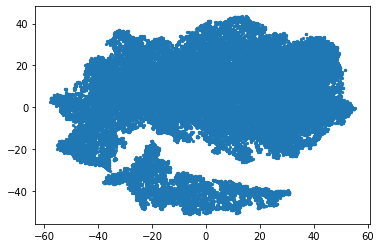

In [51]:
best_clusters = 28
il_data_df = reduced_dim_df(il_X, il_unique_words, il_model, best_clusters, 0)

plt.scatter(il_data_df.x, il_data_df.y, s=5)
plt.show

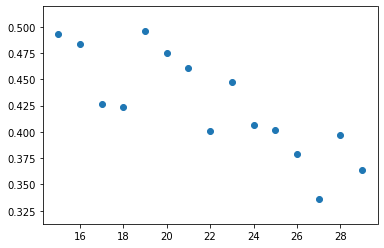

In [40]:
pa_X = np.ones(100)
for word in pa_unique_words:
    pa_X = np.vstack((pa_X, pa_model[word]))
pa_X = pa_X[1:, :]

kmeans_elbow_graph(pa_X, 15, 30, 0)

C:\Users\CK\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 35576 samples in 0.302s...
[t-SNE] Computed neighbors for 35576 samples in 172.854s...
[t-SNE] Computed conditional probabilities for sample 1000 / 35576
[t-SNE] Computed conditional probabilities for sample 2000 / 35576
[t-SNE] Computed conditional probabilities for sample 3000 / 35576
[t-SNE] Computed conditional probabilities for sample 4000 / 35576
[t-SNE] Computed conditional probabilities for sample 5000 / 35576
[t-SNE] Computed conditional probabilities for sample 6000 / 35576
[t-SNE] Computed conditional probabilities for sample 7000 / 35576
[t-SNE] Computed conditional probabilities for sample 8000 / 35576
[t-SNE] Computed conditional probabilities for sample 9000 / 35576
[t-SNE] Computed conditional probabilities for sample 10000 / 35576
[t-SNE] Computed conditional probabilities for sample 11000 / 35576
[t-SNE] Computed conditional probabilities for sample 12000 / 35576
[t-SNE] Computed conditional probabilities for 

<function matplotlib.pyplot.show(*args, **kw)>

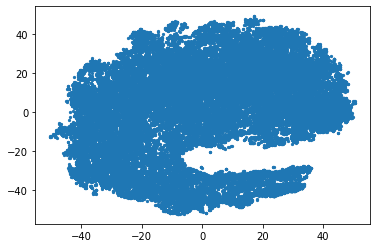

In [52]:
best_clusters = 27
pa_data_df = reduced_dim_df(pa_X, pa_unique_words, pa_model, best_clusters, 0)

plt.scatter(pa_data_df.x, pa_data_df.y, s=5)
plt.show

In [55]:
#export the data
mi_data_df = mi_data_df[['x', 'y', 'word', 'label']]
il_data_df = il_data_df[['x', 'y', 'word', 'label']]
pa_data_df = pa_data_df[['x', 'y', 'word', 'label']]

# mi_data_df.to_csv('mi_embed_text.tsv', sep='\t', index=False)
# il_data_df.to_csv('il_embed_text.tsv', sep='\t', index=False)
# pa_data_df.to_csv('pa_embed_text.tsv', sep='\t', index=False)

In [85]:
def generate_polarity_scores(tweets):
    punct_re = r'[^(\w)#!?@]'
    analyzer = SentimentIntensityAnalyzer()
    clean_tweets = tweets.str.replace(punct_re, ' ', regex=True).to_list()

    polarity_list = []
    for tweet in clean_tweets:
        vs = analyzer.polarity_scores(tweet)
        vs['tweet'] = tweet
        polarity_list.append(vs)
        
    return pd.DataFrame(polarity_list)

In [86]:
mi_polarity_df = generate_polarity_scores(mi_df['tweet'])
mi_polarity_df = mi_polarity_df[['tweet', 'compound', 'pos', 'neg', 'neu']].sort_values(by=['pos', 'neg'], ascending=False)
mi_polarity_df.head(10)

,tweet,compound,pos,neg,neu
5696,Yes! Yes! Yes! Yes! Yes! #JOEBIDEN2020 #JoeBid...,0.9283,0.830,0.0,0.170
798,Beautiful health care! #Trump,0.8122,0.787,0.0,0.213
4340,@realDonaldTrump trump covid super spreader ...,0.9081,0.695,0.0,0.305
872,â Winning ðŸ Winning ðŸ Winning #Debate2020...,0.8807,0.671,0.0,0.329
5249,#Biden win Michigan,0.5859,0.655,0.0,0.345
5715,#biden just won,0.5719,0.649,0.0,0.351
2078,@ElectProject And #Trump will win Easily,0.7351,0.608,0.0,0.392
5845,haha #JoeBiden #PresidentElect,0.4588,0.600,0.0,0.400
5610,ROFL! Biden FTW #Biden #ProtectTheVote #F...,0.9162,0.597,0.0,0.403
790,Love that response #Trump,0.6369,0.583,0.0,0.417


In [87]:
il_polarity_df = generate_polarity_scores(il_df['tweet'])
il_polarity_df = il_polarity_df[['tweet', 'compound', 'pos', 'neg', 'neu']].sort_values(by=['pos', 'neg'], ascending=False)
il_polarity_df.head(10)

,tweet,compound,pos,neg,neu
1006,@50cent Woot woot welcome to the good side #trump,0.8885,0.697,0.000,0.303
4810,@realDonaldTrump Good luck Mr President #Make...,0.8779,0.669,0.000,0.331
10203,#Biden wins Virginia!,0.6114,0.666,0.000,0.334
676,LOVE LOVE LOVE this!!! #MAGA #Trump #TrumpRa...,0.9564,0.662,0.000,0.338
9421,@guypbenson Wow #Biden,0.5859,0.655,0.000,0.345
11371,#Biden won #2020Election,0.5719,0.649,0.000,0.351
11531,Hope relief joy excitement love thankful ...,0.9857,0.637,0.000,0.363
7024,ðŸ ˆ Proud supporter of #MrRogers Proud suppo...,0.8555,0.634,0.000,0.366
2039,More peace NO WAR NO TENSION Just peace ...,0.9407,0.626,0.075,0.299
10146,Wow is #Biden doing great in Texas another su...,0.8750,0.625,0.000,0.375


In [88]:
pa_polarity_df = generate_polarity_scores(pa_df['tweet'])
pa_polarity_df = pa_polarity_df[['tweet', 'compound', 'pos', 'neg', 'neu']].sort_values(by=['pos', 'neg'], ascending=False)
pa_polarity_df.head(10)

,tweet,compound,pos,neg,neu
862,#Trump wins!!!!!,0.7067,0.830,0.0,0.170
8341,#Biden Wins,0.5719,0.787,0.0,0.213
5243,#trump better win pa,0.7717,0.770,0.0,0.230
671,@RealJamesWoods #TRUMP SUPER SPREADER!!!!,0.7783,0.659,0.0,0.341
10171,#JoeBiden Honor Courage Commitment https ...,0.8402,0.643,0.0,0.357
8190,Yay #JoeBiden #Debates2020,0.5267,0.630,0.0,0.370
11163,@StarMakerBolin Agree Great showing by #Biden,0.7650,0.623,0.0,0.377
4513,#Trump #miamirally WOW what amazing ENERGY! ...,0.9092,0.621,0.0,0.379
11639,IT IS GOOD LUCK OMG #BIDEN,0.7096,0.596,0.0,0.404
6878,God Bless the United States of America! Keep ...,0.9456,0.590,0.0,0.410


In [108]:
ca_polarity_df = generate_polarity_scores(ca_df['tweet'])
ca_polarity_df = ca_polarity_df[['tweet', 'compound', 'pos', 'neg', 'neu']].sort_values(by=['pos', 'neg'], ascending=False)
ca_polarity_df.head(10)

,tweet,compound,pos,neg,neu
52276,Wow wow wow! Congrats America! Congrats World!...,0.9944,0.908,0.0,0.092
29992,ha ha ha haha ha #LeBronJames #DonaldTrump #In...,0.9794,0.820,0.0,0.180
36745,#JoeBiden Yay!!!!,0.6776,0.820,0.0,0.180
47112,YOU BETTER WIN! #JoeBiden,0.8576,0.809,0.0,0.191
55274,#JoeBiden congratulations!,0.6360,0.807,0.0,0.193
47771,Congratulations #Biden for win,0.8271,0.794,0.0,0.206
52710,#Biden #win,0.5859,0.792,0.0,0.208
23647,#Trump right now No no no no no no no n...,0.8780,0.791,0.0,0.209
37447,#Biden Wins,0.5719,0.787,0.0,0.213
54824,#Lakers won #Championship #Dodgers won #Champ...,0.9718,0.785,0.0,0.215


In [102]:
def plot_polarity(df, word1, word2, polarity_measure):
    df_contains_1 = df[df['tweet'].str.contains(word1, case=False)]
    df_contains_2 = df[df['tweet'].str.contains(word2, case=False)]
    
    sns.distplot(df_contains_1[polarity_measure], label=word1)
    sns.distplot(df_contains_2[polarity_measure], label=word2)
    plt.legend()

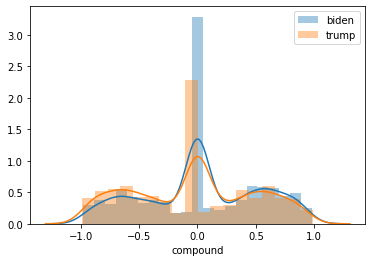

In [104]:
plot_polarity(mi_polarity_df, 'biden', 'trump', 'compound')

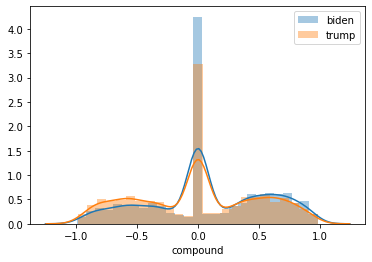

In [105]:
plot_polarity(il_polarity_df, 'biden', 'trump', 'compound')

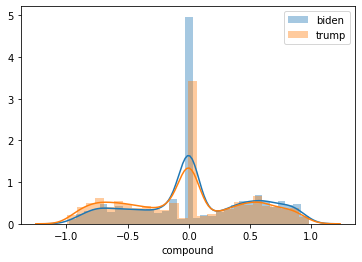

In [106]:
plot_polarity(pa_polarity_df, 'biden', 'trump', 'compound')

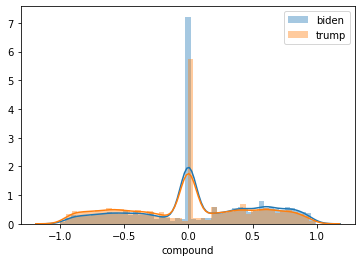

In [109]:
plot_polarity(ca_polarity_df, 'biden', 'trump', 'compound')